<a href="https://colab.research.google.com/github/lokillox3swagerl/Analisis-de-datos---VIBECODING/blob/main/Informatica_y_sociedad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Vibe coding - IyS (Respuestas) - Respuestas de formulario 1.csv")

In [ ]:
df = df[["¿Conoces el concepto de Vibe Coding?", "Nivel de Carrera", "¿Cuantos años llevas programando?", "¿Has usado Vibe Coding en un trabajo fuera de lo académico?", "¿En que área de la computación has utilizado Vibe Coding?", "¿Que tan de acuerdo estás con la siguiente frase?\n\nEl habito de Vibe Coding en los trabajos académicos de los estudiantes serán traspasados totalmente al habito laboral una vez termine su formación"]]

In [ ]:
df.head()

,¿Conoces el concepto de Vibe Coding?,Nivel de Carrera,¿Cuantos años llevas programando?,¿Has usado Vibe Coding en un trabajo fuera de lo académico?,¿En que área de la computación has utilizado Vibe Coding?,¿Que tan de acuerdo estás con la siguiente frase?\n\nEl habito de Vibe Coding en los trabajos académicos de los estudiantes serán traspasados totalmente al habito laboral una vez termine su formación
0,Si,10,5 años,Si,"Desarrollo Frontend, Desarrollo Backend, Bases...",Ni de acuerdo ni en desacuerdo
1,Si,10,6-10 años,Si,"Desarrollo Frontend, Desarrollo Backend, Ciber...",Ni de acuerdo ni en desacuerdo
2,Si,4,4 años,No,"Desarrollo Frontend, Internet de las cosas (IoT)",Totalmente de acuerdo
3,Si,8,4 años,Si,"Desarrollo Frontend, Internet de las cosas (IoT)",Ni de acuerdo ni en desacuerdo
4,Si,8,5 años,No,"Desarrollo Frontend, Desarrollo movil, Bases d...",Ni de acuerdo ni en desacuerdo


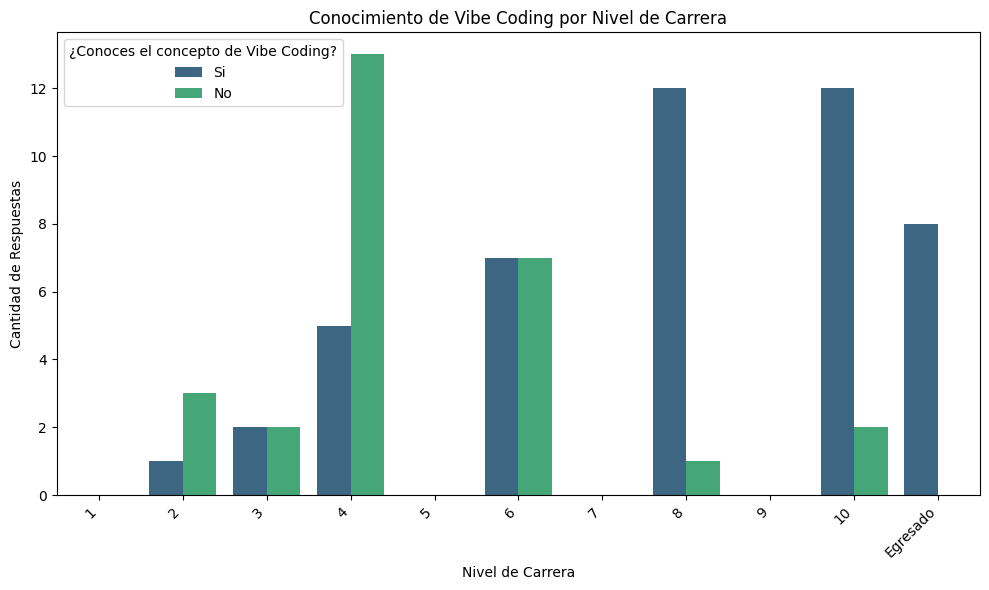

In [ ]:
# Define the desired order for the x-axis categories
order = ['1','2', '3', '4' ,'5', '6', '7', '8', '9', '10', 'Egresado']

# Create a countplot with the specified order
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Nivel de Carrera", hue="¿Conoces el concepto de Vibe Coding?", palette="viridis", order=order)

plt.title('Conocimiento de Vibe Coding por Nivel de Carrera')
plt.xlabel('Nivel de Carrera')
plt.ylabel('Cantidad de Respuestas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*A* medida de que van aumentando los niveles de la carrera, el concepto de Vibe Coding se hace cada vez más conocido y posiblemente su uso. Esto se podría explicar porque, a medida que avanzan en la carrera, los estudiantes tienen mayor exposición a distintas herramientas y recursos relacionados con la programación, lo que aumenta la probabilidad de conocer y utilizar Vibe Coding.

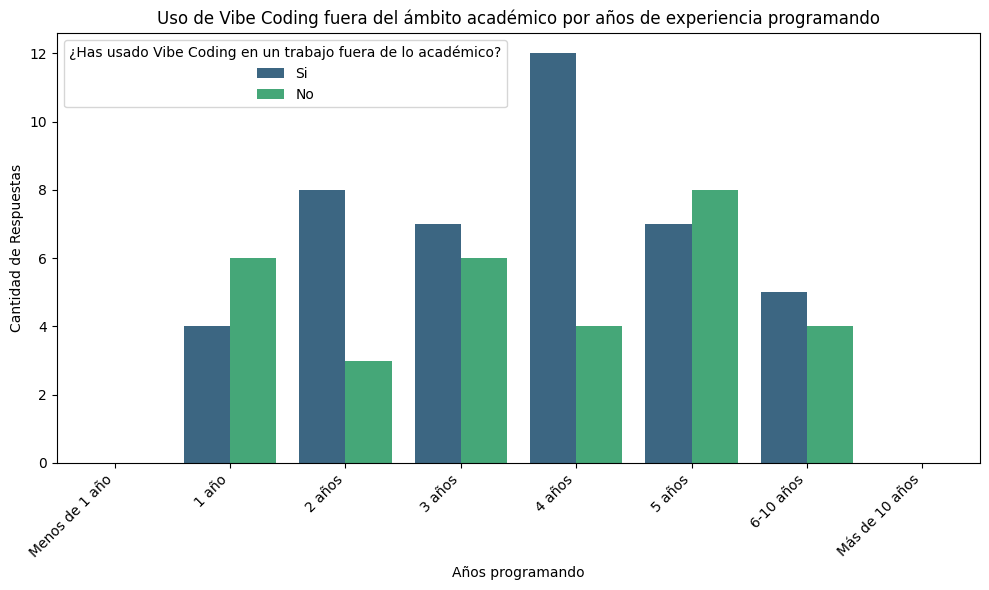

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order for the programming experience categories
order = ['Menos de 1 año', '1 año', '2 años', '3 años', '4 años', '5 años', '6-10 años', 'Más de 10 años']

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="¿Cuantos años llevas programando?", hue="¿Has usado Vibe Coding en un trabajo fuera de lo académico?", palette="viridis", order=order)

plt.title('Uso de Vibe Coding fuera del ámbito académico por años de experiencia programando')
plt.xlabel('Años programando')
plt.ylabel('Cantidad de Respuestas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El uso del vibe coding fuera del ámbito academico demuestra que hay una tendencia a ocupar dicha práctica en entre 2 y 4 años de experiencia, sin embargo de muestra un declive en su uso al ganar mas años. Esto puede deberse a que, a medida que los estudiantes ganan experiencia y enfrentan problemas más complejos, desarrollan un pensamiento crítico y prefieren crear o adaptar su propio código en lugar de depender tanto del generado por IA.


In [ ]:
# Separar las áreas en listas
df["¿En que área de la computación has utilizado Vibe Coding?"] = df["¿En que área de la computación has utilizado Vibe Coding?"].str.split(",")

# Convertir cada área en una fila
df_exploded = df.explode("¿En que área de la computación has utilizado Vibe Coding?")

# Quitar espacios extra
df_exploded["¿En que área de la computación has utilizado Vibe Coding?"] = df_exploded["¿En que área de la computación has utilizado Vibe Coding?"].str.strip()

df_exploded = df_exploded[["Nivel de Carrera", "¿En que área de la computación has utilizado Vibe Coding?"]]

nombres_cortos = {
    'Desarrollo Frontend': 'Frontend',
    'Desarrollo Backend': 'Backend',
    'Desarrollo movil': 'Móvil',
    'Bases de datos': 'BD',
    'Internet de las cosas (IoT)': 'IoT',
    'Desarrollo de Realidad Virtual (VR)': 'VR',
    'Realidad Aumentada (AR)': 'AR',
    'Videojuegos': 'Juegos',
    'Redes y comunicaciones': 'Redes',
    'Inteligencia artificial': 'IA',
    'Ciberseguridad': 'Ciberseg.'
}

# Aplicar el mapeo
df_exploded["Área"] = df_exploded["¿En que área de la computación has utilizado Vibe Coding?"].map(nombres_cortos)

df_exploded["Área"] = (
    df_exploded["¿En que área de la computación has utilizado Vibe Coding?"]
    .str.strip()  # quitar espacios
    .map(nombres_cortos)  # traducir con el diccionario
    .fillna("Otros")      # lo que no esté, pasa a "Otros"
)


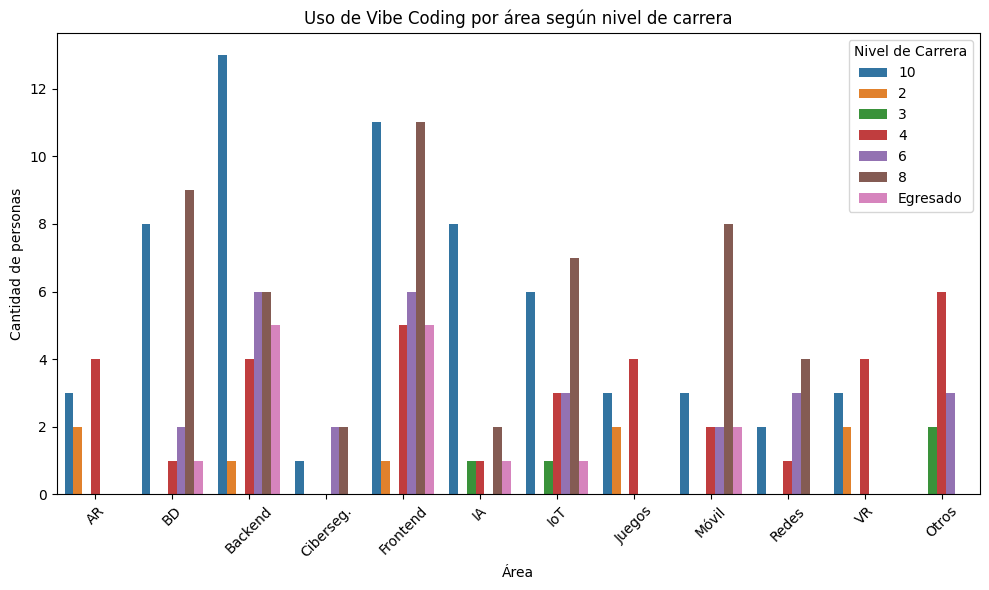

In [ ]:
conteo = (
    df_exploded
    .groupby(["Nivel de Carrera", "Área"])
    .size()
    .reset_index(name="cantidad")
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=conteo,
    x="Área",
    y="cantidad",
    hue="Nivel de Carrera"
)

plt.title("Uso de Vibe Coding por área según nivel de carrera")
plt.xlabel("Área")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=45)  # girar etiquetas si son largas
plt.legend(title="Nivel de Carrera")
plt.tight_layout()
plt.show()

En términos generales, los estudiantes han utilizado Vibe Coding principalmente en el área de desarrollo web, destacando el sector Frontend. Se observa, además, que los estudiantes de décimo nivel lo han empleado con mayor frecuencia en este ámbito. Esto podría deberse a que esta generación fue la primera en tener un contacto directo con los modelos LLM, incorporándolos tempranamente en su formación profesional y explorando su capacidad en proyectos reales.

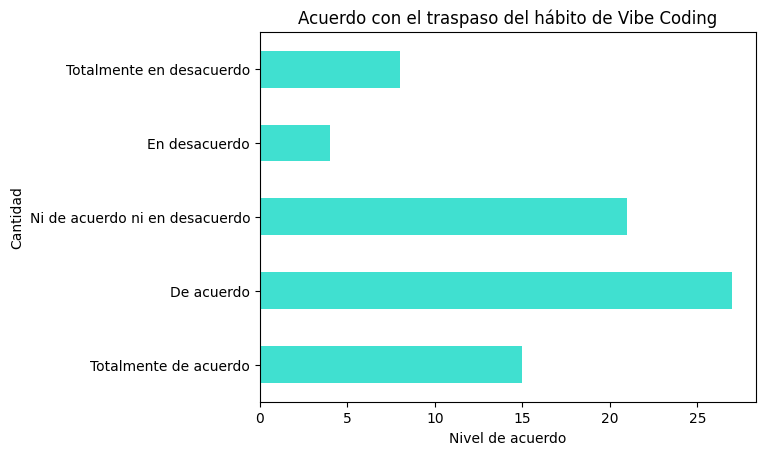

In [ ]:
col = '¿Que tan de acuerdo estás con la siguiente frase?\n\nEl habito de Vibe Coding en los trabajos académicos de los estudiantes serán traspasados totalmente al habito laboral una vez termine su formación'
orden = [
    'Totalmente de acuerdo',
    'De acuerdo',
    'Ni de acuerdo ni en desacuerdo',
    'En desacuerdo',
    'Totalmente en desacuerdo'
]
conteo = df[col].value_counts().reindex(orden)
conteo.plot(kind='barh', color='turquoise')
plt.title('Acuerdo con el traspaso del hábito de Vibe Coding')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Cantidad')
plt.show()

Se observa que la mayoría de los estudiantes tienden a mostrar una postura positiva frente a la idea de que el hábito de Vibe Coding se trasladará al ámbito laboral. Sin embargo, también existe un grupo considerable que mantiene posiciones más neutras o incluso de desacuerdo. Esto puede deberse a diferencias en la experiencia personal de uso de la herramienta o el pensamiento que tienen del mercado laboral.

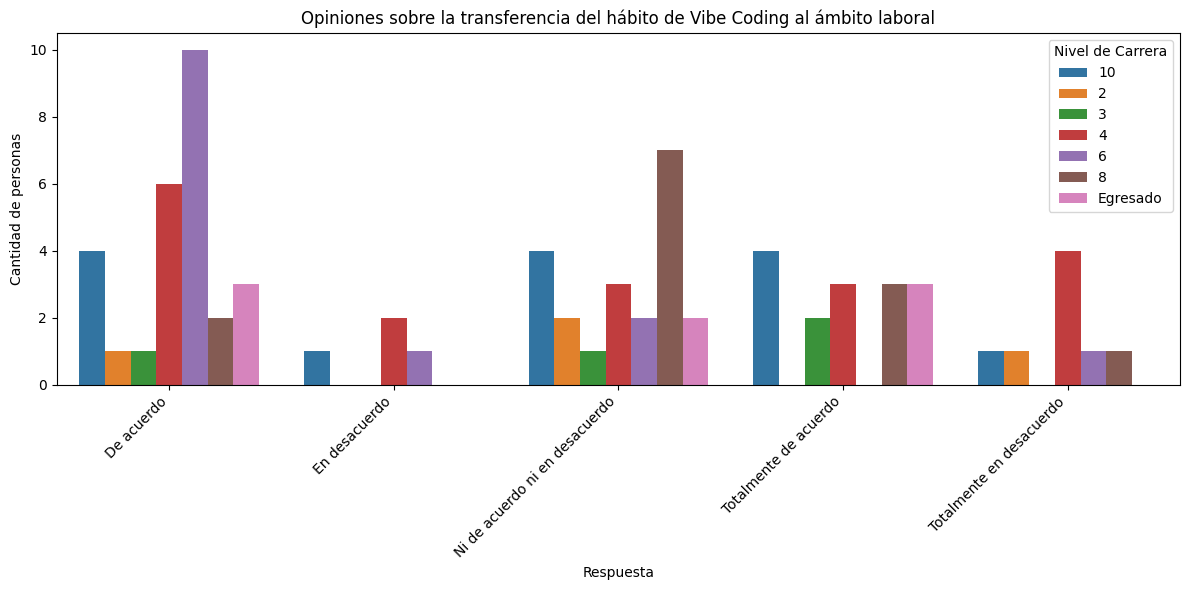

In [ ]:
col_pregunta = "¿Que tan de acuerdo estás con la siguiente frase?\n\nEl habito de Vibe Coding en los trabajos académicos de los estudiantes serán traspasados totalmente al habito laboral una vez termine su formación"

conteo_opiniones = (
    df.groupby(["Nivel de Carrera", col_pregunta])
    .size()
    .reset_index(name="cantidad")
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=conteo_opiniones,
    x=col_pregunta, y="cantidad",
    hue="Nivel de Carrera"
)

plt.title("Opiniones sobre la transferencia del hábito de Vibe Coding al ámbito laboral")
plt.xlabel("Respuesta")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Nivel de Carrera")
plt.tight_layout()
plt.show()

La mayoría de los estudiantes está de acuerdo o totalmente de acuerdo en que Vibe Coding puede trasladarse al ámbito laboral. Los estudiantes de nivel 6 es el grupo más convencido, con la mayor cantidad de respuestas "De acuerdo".

En niveles altos y egresados hay opiniones más variadas (acuerdo, neutralidad y desacuerdo), mostrando una visión más crítica.

Text(0, 0.5, '')

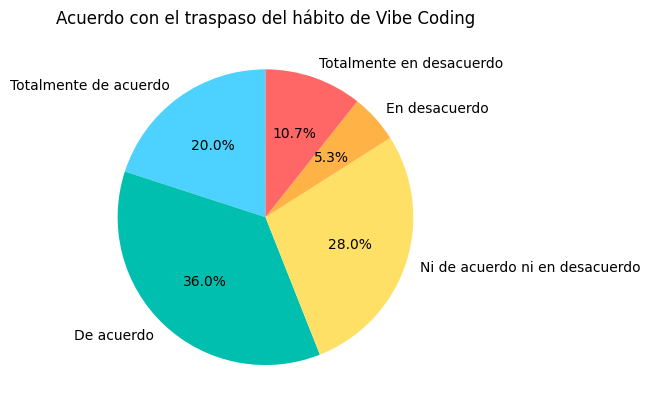

In [ ]:
col = '¿Que tan de acuerdo estás con la siguiente frase?\n\nEl habito de Vibe Coding en los trabajos académicos de los estudiantes serán traspasados totalmente al habito laboral una vez termine su formación'
orden = [
    'Totalmente de acuerdo',
    'De acuerdo',
    'Ni de acuerdo ni en desacuerdo',
    'En desacuerdo',
    'Totalmente en desacuerdo'
]
conteo = df[col].value_counts().reindex(orden)
plt.pie(
    conteo,
    labels=orden,
    autopct='%1.1f%%',
    colors=['#4dd2ff', '#00bfae', '#ffe066', '#ffb347', '#ff6666'],
    startangle=90
)
plt.title('Acuerdo con el traspaso del hábito de Vibe Coding')
plt.ylabel('')



Al desglosar por nivel de carrera, se aprecia que las opiniones varían en función del avance académico. Los estudiantes de niveles más altos suelen mostrar mayor confianza en el hábito de vibe coding hacia el mundo laboral, mientras que en los niveles iniciales se pueden observar respuestas polarizadas. Esto puede deberse a la experiencia que van ganando los estudiantes a medida que van utilizando los modelos LLM.

# Conclusión
Los resultados muestran que el uso del Vibe Coding aumenta a medida que los estudiantes avanzan en la carrera, dado que tienen mayor exposición a herramientas y recursos de programación. Ademas sobre el traspaso del habito de Vibe Coding al ambito laboral un 56% está de acuerdo o totalmente de acuerdo en que Vibe Coding puede trasladarse al ámbito laboral pero en niveles altos y egresados hay opiniones más variadas, ya que los estudiantes y profesionales más avanzados desarrollan un pensamiento crítico y prefieren generar o adaptar su propio código.
Segun los resultado de la encuesta los estudiantes de ingenieria en computacion utilizan el Vibe Coding principalmente en el desarrollo web, especialmente en el Frontend, con una mayor adopción en los niveles superiores de la carrera
